# Functionland Mining Rewards

-----

Last modified: March 6, 2022

# 1. System Parameters

Some key parameters being utilized:

- Cloud savings
- Hardware buy in cost
- Power consumption cost
- Tokens earned per end user
- Time (1 year)
- Amount each token is valued (Market value)


In [1]:
system_params = {
    "cloud_savings_per_month": 5,
    "hardware_buyin_cost": 50,
    "power_consumption_costs_per_month": 5,
    "tokens_mined_per_month": 1000000,
    "miners": 100,
    "time_in_years": 1,
    "token_value": 0.04
}

# 2. Simulations

In [2]:
# Importing some libraries to help visualize
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## 2.1 Cost Analysis

### 2.1.1 Cloud storage base line costs

In [3]:
# Assumed baseline avg, if we simulated many users we would see a 
# potential spread for this initial cost
# Also assumes ONLY ONE cloud provider
base_line_cost = (system_params['cloud_savings_per_month'] * 12 )   
print('Current Avg. Cost: -$' + str(base_line_cost) + " per year for cloud storage")

Current Avg. Cost: -$60 per year for cloud storage


### 2.1.2A | Functionland Box buy-in costs

In [4]:
# Functionland Box buy-in costs         
funcBox_cost = (system_params['hardware_buyin_cost'] )
print('Projected buy-in cost: -$' + str(funcBox_cost))

Projected buy-in cost: -$50


### 2.1.2B | Projected Yearly Power Costs

In [5]:
yearly_power_costs = (system_params['power_consumption_costs_per_month'] * 12)
print('Projected yearly power cost: -$' + str(yearly_power_costs))

Projected yearly power cost: -$60


In [6]:
# Will be used in section 2.3
running_power_costs = []

running_cloud_costs = []

In [7]:
running_cloud_costs.append(system_params['cloud_savings_per_month'])
running_power_costs.append(system_params['power_consumption_costs_per_month'])
for i in range(1, 12):
    running_cloud_costs.append(running_cloud_costs[i - 1] + system_params['cloud_savings_per_month'])
    running_power_costs.append(running_power_costs[i - 1] + system_params['power_consumption_costs_per_month'])

In [8]:
x = [i for i in range(1, 13)]

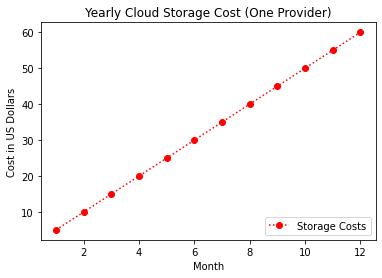

In [9]:
plt.title('Yearly Cloud Storage Cost (One Provider)')
plt.xlabel('Month')
plt.ylabel('Cost in US Dollars')
plt.plot(x, running_cloud_costs,'o:r', label='Storage Costs')
plt.legend(loc=4)
plt.show()

## 2.3 Benefits of Using this system

While the obvious one is potential for earning money, the is also the benefit of hosting your own data!


In [10]:
# Calculate the tokens mined per user 
tokens_per_user = (system_params['tokens_mined_per_month'] 
                   / system_params['miners'])

# Show the graph of the tokens earned in the month at 0.04

In [11]:
# Users (Miners)
# show the drop in amount per miner
miners_over_a_year = [system_params['miners'] * 1.05 for i in range(0, 12)]

# time 
xline = running_power_costs

# Token value, increasing one cent per month
token_value = [0.04 + (i * 0.01) for i in range(0, 12)]

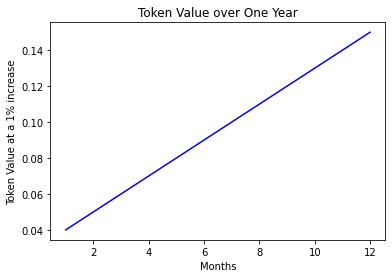

In [12]:
months = [i for i in range(1, 13)]

plt.title('Token Value over One Year')
plt.xlabel('Months')
plt.ylabel('Token Value at a 1% increase')
plt.plot(months, token_value, 'b-')
plt.show()

In [13]:
tokens_avg_per_month = [system_params['tokens_mined_per_month'] / miners_over_a_year[i - 1] for i in range(1, 13)]

In [14]:
monthly_avgs = []
monthly_avgs.append(round(tokens_avg_per_month[0], 2))

In [15]:
for i in range(1, 12):
    monthly_avgs.append(round(monthly_avgs[i - 1] + tokens_avg_per_month[i], 2))

In [16]:
monthly_avgs

[9523.81,
 19047.62,
 28571.43,
 38095.24,
 47619.05,
 57142.86,
 66666.67,
 76190.48,
 85714.29,
 95238.1,
 104761.91,
 114285.72]

In [17]:
avg_token_value = [round(monthly_avgs[i] * token_value[i], 2) for i in range(0, 12)]

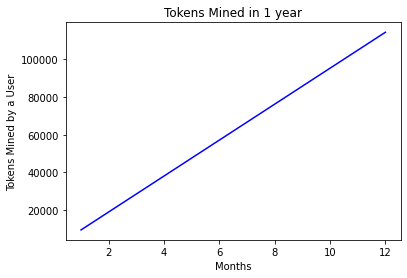

In [18]:
plt.title('Tokens Mined in 1 year')
plt.xlabel('Months')
plt.ylabel('Tokens Mined by a User')
plt.plot(months, monthly_avgs, 'b', label='Tot. Mined')
plt.show()

#### The next chart should update based on the percentage of price increase from earlier (Will be easier to manipulate in the final web app)

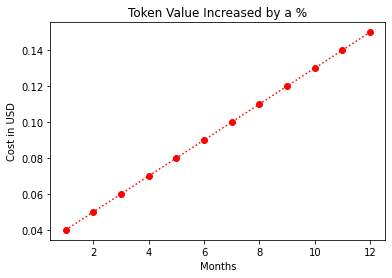

In [19]:
plt.title('Token Value Increased by a %')
plt.xlabel('Months')
plt.ylabel('Cost in USD')
plt.plot(months, token_value, 'o:r', label='Token Value')
plt.show()

## 2.4 The Power Constant

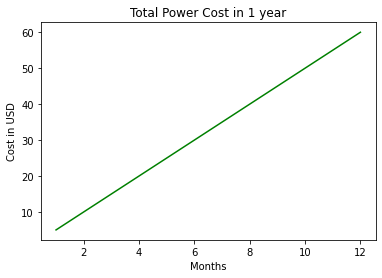

In [20]:
plt.title('Total Power Cost in 1 year')
plt.xlabel('Months')
plt.ylabel('Cost in USD')
plt.plot(months, running_power_costs, 'g', label='Power Cost')
plt.show()

Looks intimidating, and could become an issue, however, as the token value increases and the users continue to mine tokens then this cost would eventually become a menial number. 

## 2.5 Break Even Point

From what we have seen up to this point, the break even would be *almost* instantaneous (in the scope of a year). The end user would gain back the costs of their cloud storage, retain their data privacy, and gain some (potential) for income on the side. 

The main costs that would arise from this situation though are: 

- Buying additional tower silos (for a single base, this would be limited to 8 additional one time purchases)
- Repeat the above one time cost(s) for a user who buys 2 or more of the devices (all silos and base) 
     - This will happen, but I don't image people would be trying to buy 50 of these at a time unless a business attempts to "hog the portions for themselves"
     - Given the rest of the tech docs, that scenario would only benefit the network still so no harm done at this point
     

Assuming a buyin cost of $50, the user would be in the green after a couple months, if the user only got around 200 tokens at 0.04 then they would break even after 6ish (almost 7) months.

# 3. Conclusions and Examples

## 3.1 Token Price Range

### One year of mining at 0.04 cents, however, would yield: 

In [21]:
round(monthly_avgs[-1] * 0.04, 2)

4571.43

### End of the year but at 0.10 cents

In [22]:
round(monthly_avgs[-1] * 0.10, 2)

11428.57

## 3.2 How many tokens after 4 months? 

In [23]:
# Token value, increasing one cent per month
PRICE = 0.10
token_value = [ round(PRICE + (i * 0.01), 2) for i in range(0, 12)]

In [24]:
# After 4 months, a user would hold 
TOKENS_HELD = monthly_avgs[3]
print('With ' + str(system_params['miners']) + ' miners, a user would be able to mine ' + str(round(monthly_avgs[3], 2)) + ' tokens in 4 months')

With 100 miners, a user would be able to mine 38095.24 tokens in 4 months


## 3.2.1 What is their value if the token value is 5 cents?

In [25]:
PRICE = 0.05
TOKENS_AFTER_4_MONTHS = round(monthly_avgs[3], 2)

In [26]:
print("$" + str(TOKENS_AFTER_4_MONTHS * PRICE))

$1904.762


## 3.3 Disclaimers

### Keep in mind, this is one scenerio and these parameters will be adjustable in the dashboard app.


### Also note, this simulations numbers are on an assumption there is only 100 miners (if that number goes up, obviously the amount each earns in a month will *go down*)